In [9]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd

plt.style.use('ggplot')


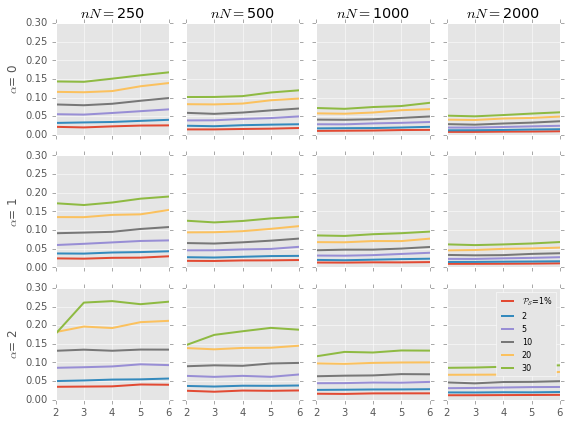

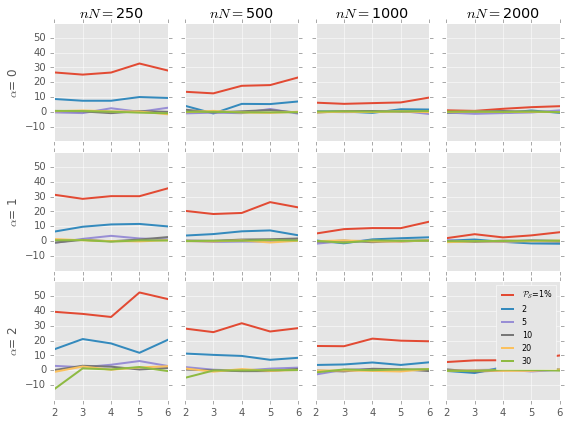

In [10]:
############################################################
#make line plots n vs error for several different n*N stays constant, for given error metric, and for all alphas
#separate by error metric

am_sim = pd.read_csv('data/estlambda_fixedsize_more.csv')

n_list = am_sim.nsamp.unique()
N_list = am_sim.npers.unique()
alpha_list = am_sim.alpha.unique()
lambda_list = am_sim.lamsim.unique()
nN=am_sim.totsamp.unique()

f1, axarr1 = plt.subplots(len(alpha_list),len(nN),sharey=True,sharex=True,figsize=(8,6),dpi=600)
f2, axarr2 = plt.subplots(len(alpha_list),len(nN),sharey=True,sharex=True,figsize=(8,6),dpi=600)

for inN in range(len(nN)):

    am_sim_nN = am_sim[am_sim.totsamp == nN[inN]]

    for ia in range(len(alpha_list)):

        for il in range(len(lambda_list)):
            
            lam=lambda_list[il]
            al=alpha_list[ia]
            
            df = am_sim_nN.query('(lamsim==' + str(lam) +') & (alpha==' + str(al) + ')' )

            axarr1[ia][inN].plot(n_list,df['stddevlamest'],lw=2)
            axarr2[ia][inN].plot(n_list,df['pbiaslamest'],lw=2)

        #axarr[0][ia].set_title(r'$\alpha=$'+ str(al),fontsize=12)
        #axarr[1][ia].set_ylim([-5,35])
        #axarr[0][ia].set_ylim([0,0.3])
    
        axarr1[ia][0].set_ylabel(r'$\alpha$= ' + str(al))
        axarr2[ia][0].set_ylabel(r'$\alpha$= ' + str(al))

    axarr1[0][inN].set_title(r'$nN = $' + str(nN[inN]))
    axarr2[0][inN].set_title(r'$nN = $' + str(nN[inN]))

axarr1[0][0].set_yticks(np.linspace(0,0.3,7))
axarr2[0][0].set_yticks(np.linspace(-10,50,7))

axarr1[2][3].legend([r'$\mathcal{P}_\mathcal{S}$=1%','2','5','10','20','30'],loc=1,fontsize=8)
axarr2[2][3].legend([r'$\mathcal{P}_\mathcal{S}$=1%','2','5','10','20','30'],loc=1,fontsize=8)

axarr1[0][0].set_xticks(range(min(n_list),max(n_list)+1))
axarr2[0][0].set_xticks(range(min(n_list),max(n_list)+1))

f1.tight_layout()
f1.savefig('figures/stddev_nN.pdf')  # No warning now
f2.tight_layout()
f2.savefig('figures/bias_nN.pdf')  # No warning now


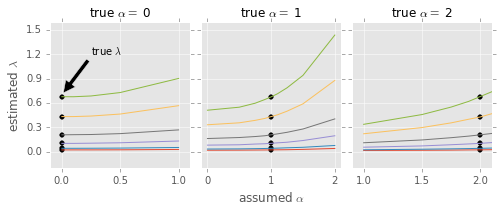

In [11]:
am_sim = pd.read_csv('data/estlambda_misspec_alpha.csv')

n=3; N=500

alpha_used_list = list(am_sim.alphause.unique())
alpha_list = list(am_sim.alpha.unique())
lambda_list = list(am_sim.lamsim.unique())

f, axarr = plt.subplots(1,len(alpha_list),sharey=True,sharex=False,figsize=(7,3),dpi=600)
iax=0
for al in alpha_list:
    temp1_df = am_sim[am_sim['alpha']==al]
    ax=axarr[iax]
    for lam in lambda_list:
        temp2_df=temp1_df[temp1_df['lamsim']==lam]
        
        #ax.plot(temp2_df['alphause'],temp2_df['lamsim'].iloc[0]+np.exp((temp2_df['alphause']-iax)/8),color='k')

        ax.plot(temp2_df['alphause'],temp2_df['meanlamest'])
        ax.scatter(iax,temp2_df['lamsim'].iloc[0],color='k')
        ax.set_title(r'true $\alpha=$ ' + str(alpha_list[iax]),fontsize=12)
    iax+=1
#axarr[0].legend(['$p_\mathcal{S}$=0.01','0.02','0.05','0.10','0.20','0.30'],loc=0,fontsize=8)
#axarr[0].legend(lambda_list,fontsize=8)
axarr[0].set_ylabel(r'estimated $\lambda$')
axarr[1].set_xlabel(r'assumed $\alpha$')

axarr[0].set_xlim([-0.1,1.1])
axarr[0].set_xticks(np.linspace(0,1,3))
axarr[0].annotate('true $\lambda$', xy=(0, 0.7), xytext=(0.25, 1.2),
                  arrowprops=dict(facecolor='black', shrink=0.05))

axarr[1].set_xlim([-0.1,2.1])
axarr[1].set_xticks(np.linspace(0,2,3))

axarr[2].set_xlim([0.9,2.1])
ax.set_yticks(np.linspace(0,1.5,6))
axarr[2].set_xticks(np.linspace(1,2,3))
plt.tight_layout()

plt.savefig('figures/wrong_alpha.pdf')  # No warning now


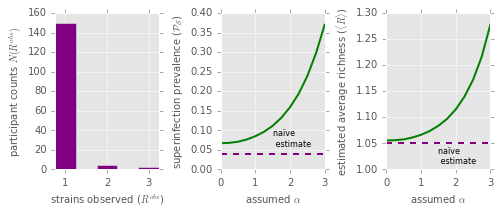

In [12]:
#grebely hepatology for example! assumes n=2??

data=np.array([150.,4.,2.])

#using n=2, data=[150,6]
#est_Ps=[0.07549872,0.07644676,0.08023228,0.08636106,0.09573513,0.10874729,0.12619874,0.14924489,0.17930570,0.21834674,0.26494948,0.32855865, 0.39499033]

#using n=5, data=[150,4,2,0,0]
est_Ps=[0.06693641, 0.06789043, 0.07074853, 0.07644676, 0.08494922, 0.09620209, 0.11151869, 0.13211408, 0.15905378, 0.19362009, 0.23880916, 0.29708831, 0.36983317]
est_r =[1.055490, 1.056008, 1.057564, 1.061200, 1.066408, 1.073727, 1.083713, 1.096944, 1.115104, 1.139434, 1.171841, 1.216132, 1.277750]

alpha=np.arange(0,3.1,0.25)
robs = np.arange(1,len(data)+1)

naive_r=sum(data*robs)/sum(data)
naive_Ps=sum(data[1:])/sum(data)

plt.figure(figsize=(7,3),dpi=600)

plt.subplot(131)
plt.bar(robs,data,color='purple',width=0.5)
plt.xticks(robs+0.25,robs)
#plt.xlim([0.5,3])
plt.ylabel(r'participant counts $N(R^{obs})$',fontsize=10)
plt.xlabel(r'strains observed ($R^{obs}$)',fontsize=10)

plt.subplot(132)
plt.plot(alpha,est_Ps,color='green',lw=2)
plt.axhline(naive_Ps,color='purple',ls='--',lw=2)
plt.xticks(range(4))
plt.ylabel(r'superinfection prevalence ($\mathcal{P}_\mathcal{S}$)',fontsize=10)
plt.xlabel(r'assumed $\alpha$',fontsize=10)
plt.annotate('naïve \n estimate', xy=(1.5, naive_Ps+0.02), xytext=(1.5, naive_Ps+0.02),fontsize=8)
plt.yticks(np.linspace(0,0.4,9))

plt.subplot(133)
plt.plot(alpha,est_r,color='green',lw=2)
plt.axhline(naive_r,color='purple',ls='--',lw=2)
plt.xticks(range(4))
plt.ylabel(r'estimated average richness ($\langle R \rangle$)',fontsize=10)
plt.xlabel(r'assumed $\alpha$',fontsize=10)
plt.ylim([1,1.3])
plt.annotate('naïve \n estimate', xy=(1.5, 1.01), xytext=(1.5, 1.01),fontsize=8)

plt.tight_layout()

plt.savefig('figures/eg_grebley_hcv.pdf')

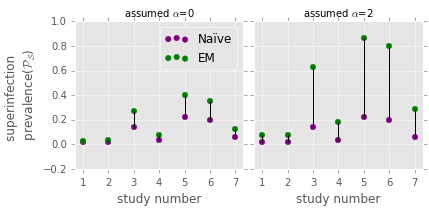

In [13]:
f, axarr = plt.subplots(1,2,sharey=True,sharex=True,figsize=(6,3),dpi=600)

#all the data from Redd review paper
#N=np.array([13.,78,16,58,8,14,46,145,147,149,56,7,44,130,145])
#N2=np.array([1.,3,1,13,1,2,2,3,2,7,12,1,3,2,10])

N2=np.array([3. ,2. ,1,3 ,13,7 ,1 ])
N =np.array([196,126,7,78,58,36,16])


#from amalia example code first alpha=0, then alpha=2
pest_al = [np.array([0.03018994, 0.03116927, 0.26736624, 0.07549872, 0.40366453, 0.35531706, 0.12117160]),
           np.array([0.07169990, 0.07407541, 0.63217069, 0.17930570, 0.86312198, 0.79924364, 0.28925047])]


N1=N-N2

dataset=np.arange(1,len(N1)+1)

#sort by naive max to min (sneaky negative stuff)
naive=N2/N
#inds =N.argsort()
#naive=naive[inds]

#x axis lables
#Nlabels = list([int(N[inds][_]) for _ in range(len(N1))])
sN=30#N[inds]/3
#sN=N

i=0
for j in [0,1]:
    
    pest=pest_al[j]#[inds]

    axarr[i].scatter(dataset,naive,color='purple',s=sN)
    axarr[i].scatter(dataset,pest,color='green',s=sN)
    axarr[i].vlines(dataset, naive, pest)#,lw=sN/10)
    #axarr[i].set_title('naive avg = ' + str(np.round(np.mean(naive),2)*100) + '  estimated avg = ' + str(np.round(np.mean(pest),2)*100),fontsize=10)
    axarr[i].set_xlabel('study number')
    axarr[i].set_xticks(dataset)
    #axarr[i].set_xticklabels(Nlabels,rotation=45)

    i+=1
    
axarr[0].set_title(r'assumed $\alpha$=0',fontsize=10)
axarr[0].legend(['Naïve','EM'])
axarr[1].set_title(r'assumed $\alpha$=2',fontsize=10)
#axarr[1].set_ylim([0,0.6])
#axarr[1].set_yticks(np.linspace(0,0.6,7))
axarr[0].set_ylabel('superinfection \n prevalence' + r'($\mathcal{P}_\mathcal{S}$)')

plt.tight_layout()
plt.savefig('figures/eg_HIV.pdf')